In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import Kernel

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline
plt.rcParams['text.latex.preamble'] = [r'\usepackage{newtxmath}'] 
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
plt.rc('text', usetex=True)

/var/folders/yg/djxj05p562nc92kcrz6sfj3c0000gn/T/ipykernel_35351/3356598534.py:2: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{newtxmath}']


In [4]:
np.random.seed(100)

In [5]:
def target_func(x, omega=2*np.pi):
    return np.sin(omega * x)

n_train = 30
x_train = np.random.rand(n_train)[:, np.newaxis]

sigma = .2
kernel = Kernel('gaussian', sigma=sigma)
kernel.set_support(x_train)
K = kernel(x_train)

x_test = np.linspace(0, 1, 50)
y_test = target_func(x_test)
k_test = kernel(x_test[:, np.newaxis]).T


In [6]:
alpha = np.zeros(n_train, float)
epsilon = np.zeros((n_train, 2), float)
gamma_0 = .3
gamma = np.full(n_train, gamma_0, float)
for i in range(n_train):
    z = K[i] @ alpha
    epsilon[i, 0] = np.sign(z - target_func(x_train[i,0]))
    epsilon[i, 1] = z
    alpha[i] -= epsilon[i, 0] * gamma[i]

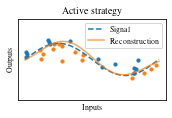

In [7]:
fig, ax = plt.subplots(1,1, figsize=(2.5, 1.75))
ind = epsilon[:, 0] == 1
a = ax.scatter(x_train[ind, 0], epsilon[ind, 1], s=10)
ind = epsilon[:, 0] == -1
b = ax.scatter(x_train[ind, 0], epsilon[ind, 1], s=10)
c, = ax.plot(x_test, y_test, linestyle='--')
y_pred = k_test @ alpha
d, = ax.plot(x_test, y_pred, alpha=.7)
ax.legend([c,d], ['Signal', 'Reconstruction'], prop={"size": 8})
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title(r'Active strategy', size=10)
ax.set_xlabel(r'Inputs',size=8)
ax.set_ylabel(r'Outputs', size=8)
fig.tight_layout()
fig.savefig('one_d_active.pdf')

In [8]:
epsilon_bis = np.zeros((n_train, 2), float)
epsilon_bis[:, 1] = np.random.randn(n_train)

In [9]:
alpha_bis = np.zeros(n_train, float)
gamma_0 = .7
gamma = np.full(n_train, gamma_0, float)
for i in range(n_train):
    epsilon_bis[i, 0] = np.sign(epsilon_bis[i, 1] - target_func(x_train[i,0]))
    err = np.sign(epsilon_bis[i, 1] - K[i] @ alpha_bis)
    if err != epsilon_bis[i, 0]:
        alpha_bis[i] -= epsilon_bis[i, 0] * gamma[i]

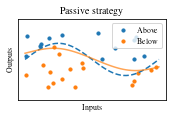

In [10]:
fig, ax = plt.subplots(1,1, figsize=(2.5, 1.75))
ind = epsilon_bis[:, 0] == 1
a = ax.scatter(x_train[ind, 0], epsilon_bis[ind, 1], s=10)
ind = epsilon_bis[:, 0] == -1
b = ax.scatter(x_train[ind, 0], epsilon_bis[ind, 1], s=10)
c, = ax.plot(x_test, y_test, linestyle='--')
y_pred_bis = k_test @ alpha_bis
d, = ax.plot(x_test, y_pred_bis, alpha=.7)
ax.legend([a,b], ['Above', 'Below'], prop={"size": 8})
ax.set_ylim(-2.5, 2.5)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Passive strategy', size=10)
ax.set_xlabel(r'Inputs',size=8)
ax.set_ylabel(r'Outputs', size=8)
fig.tight_layout()
fig.savefig('one_d_passive.pdf')